In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('parkinsons_updrs.data', sep=',', header=0)
data.rename(columns = {'sex':'gender'}, inplace=True)
data.head()

,subject#,age,gender,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   gender         5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [ ]:
data.isnull().sum()

subject#         0
age              0
gender           0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

In [ ]:
data.describe()

,subject#,age,gender,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


**Dropping Negative test_time**

In [ ]:
count = 0
for i in data["test_time"]:
    if i<0:
        data = data.drop(labels=count, axis=0)
    count+=1

In [ ]:
data.describe()

,subject#,age,gender,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,...,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000
mean,21.460345,64.814771,0.318438,93.061538,21.289655,29.014090,0.006156,0.000044,0.002988,0.003278,...,0.311012,0.017157,0.020149,0.027489,0.051470,0.032126,21.679527,0.541423,0.653252,0.219618
std,12.361029,8.827750,0.465910,53.320896,8.133419,10.709966,0.005628,0.000036,0.003126,0.003734,...,0.230310,0.013237,0.016672,0.020002,0.039710,0.059735,4.292521,0.101024,0.070955,0.091494
min,1.000000,36.000000,0.000000,0.395830,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,47.335500,15.000000,21.362000,0.003580,0.000022,0.001580,0.001825,...,0.175000,0.009280,0.010790,0.015660,0.027830,0.010953,19.404000,0.469695,0.596100,0.156385
50%,22.000000,65.000000,0.000000,91.754000,20.871000,27.522000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.917000,0.542250,0.643550,0.205560
75%,33.000000,72.000000,1.000000,138.460000,27.594000,36.400500,0.006800,0.000053,0.003290,0.003470,...,0.365000,0.020605,0.023775,0.032725,0.061805,0.031464,24.445500,0.614045,0.711480,0.264590
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [ ]:
data = data.drop(['subject#'], axis=1)
data.head()

,age,gender,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


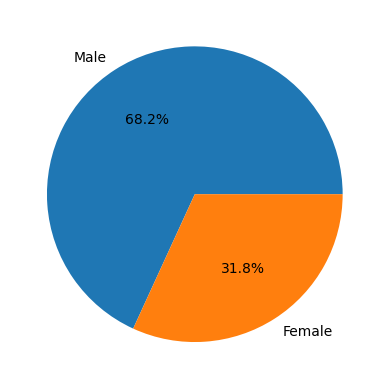

In [ ]:
w = data.gender.value_counts()
g = np.array([w[0], w[1]])
gender = ["Male", "Female"]
plt.pie(g, labels=gender, autopct='%1.1f%%')
plt.show()

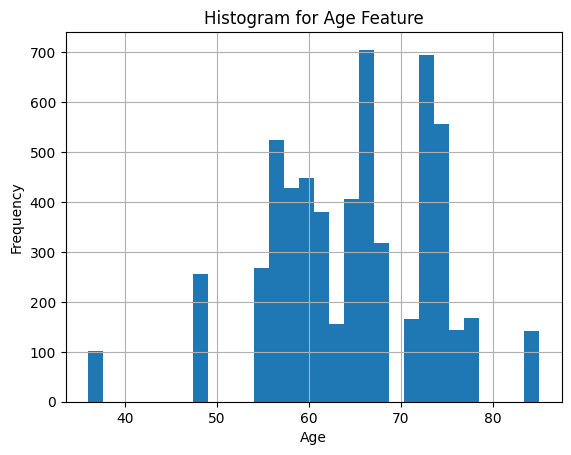

In [ ]:
data.hist('age', bins=30)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Histogram for Age Feature")
plt.show()

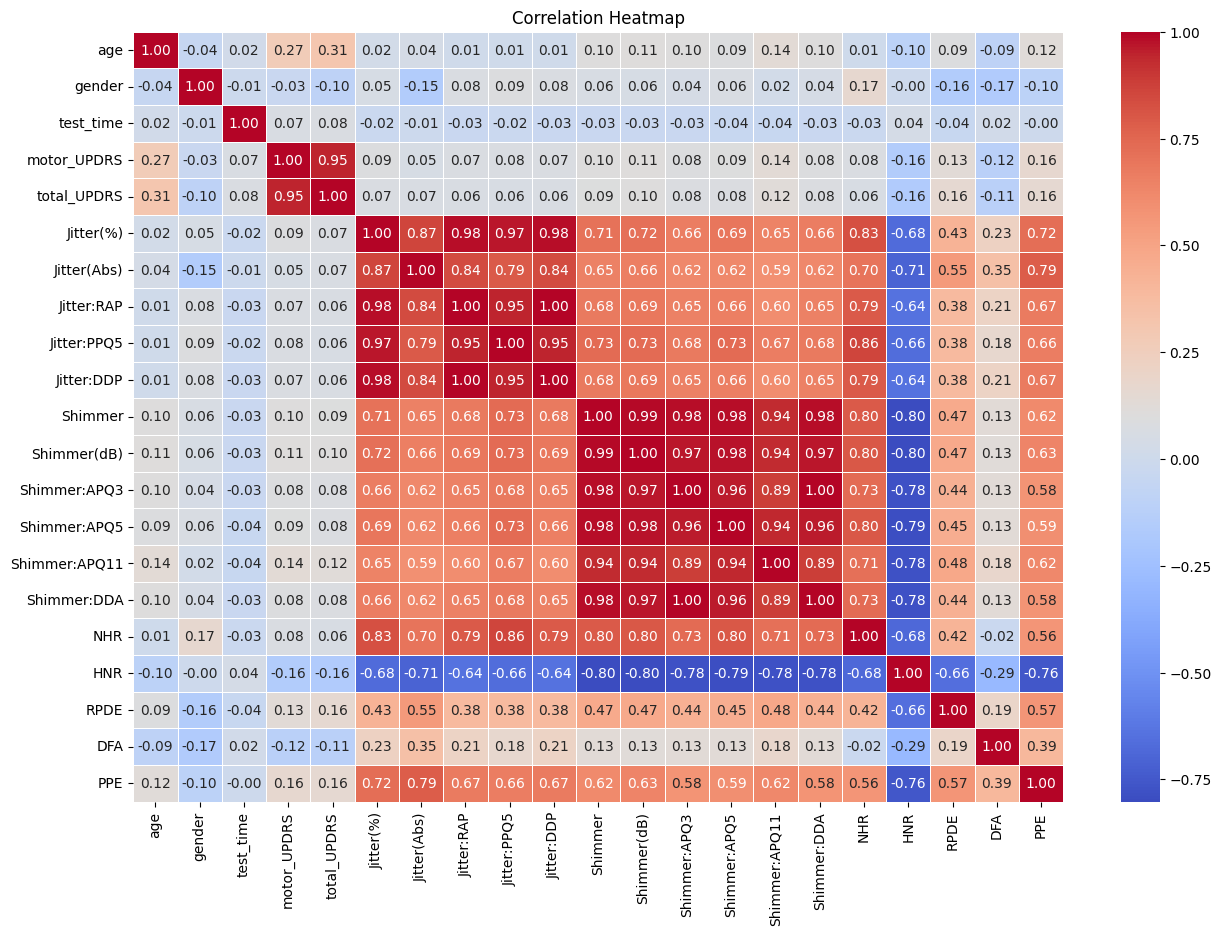

In [ ]:
corr_matrix = data.corr()

# Initialize matplotlib figure
plt.figure(figsize=(15, 10))

# Generating a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

- There seems to be a negative correlation between age and motor_UPDRS, and a positive one with total_UPDRS, which could indicate that while motor symptoms might decrease with age, the total UPDRS scores, which include non-motor aspects, might increase.

- The jitter and shimmer measurements, which reflect variations in voice frequency and amplitude, show very high intercorrelations. This is typical as they represent similar voice characteristics and are often derived from one another. These voice features have a moderate to high correlation with total_UPDRS scores, suggesting they might be good predictors for UPDRS score estimation. However, because of the high intercorrelation, using all of them in a predictive model might not be necessary or optimal.

- Gender shows very low correlation with both motor_UPDRS and total_UPDRS, indicating that sex might not be a strong predictor of UPDRS scores in this dataset.

- Non-linear dynamics measures such as RPDE, DFA, and PPE show some level of correlation with UPDRS scores, with PPE showing the strongest relationship. This suggests that non-linear characteristics of voice could be useful in predicting UPDRS scores.

- test_time has a low correlation with UPDRS scores, indicating that the progression of the disease over the timespan of the study may not be linear or might vary significantly between individuals.


- Given the high correlation between jitter and shimmer measurements, it might be useful to consider feature selection or dimensionality reduction techniques like Principal Component Analysis (PCA) to reduce multicollinearity before modeling.

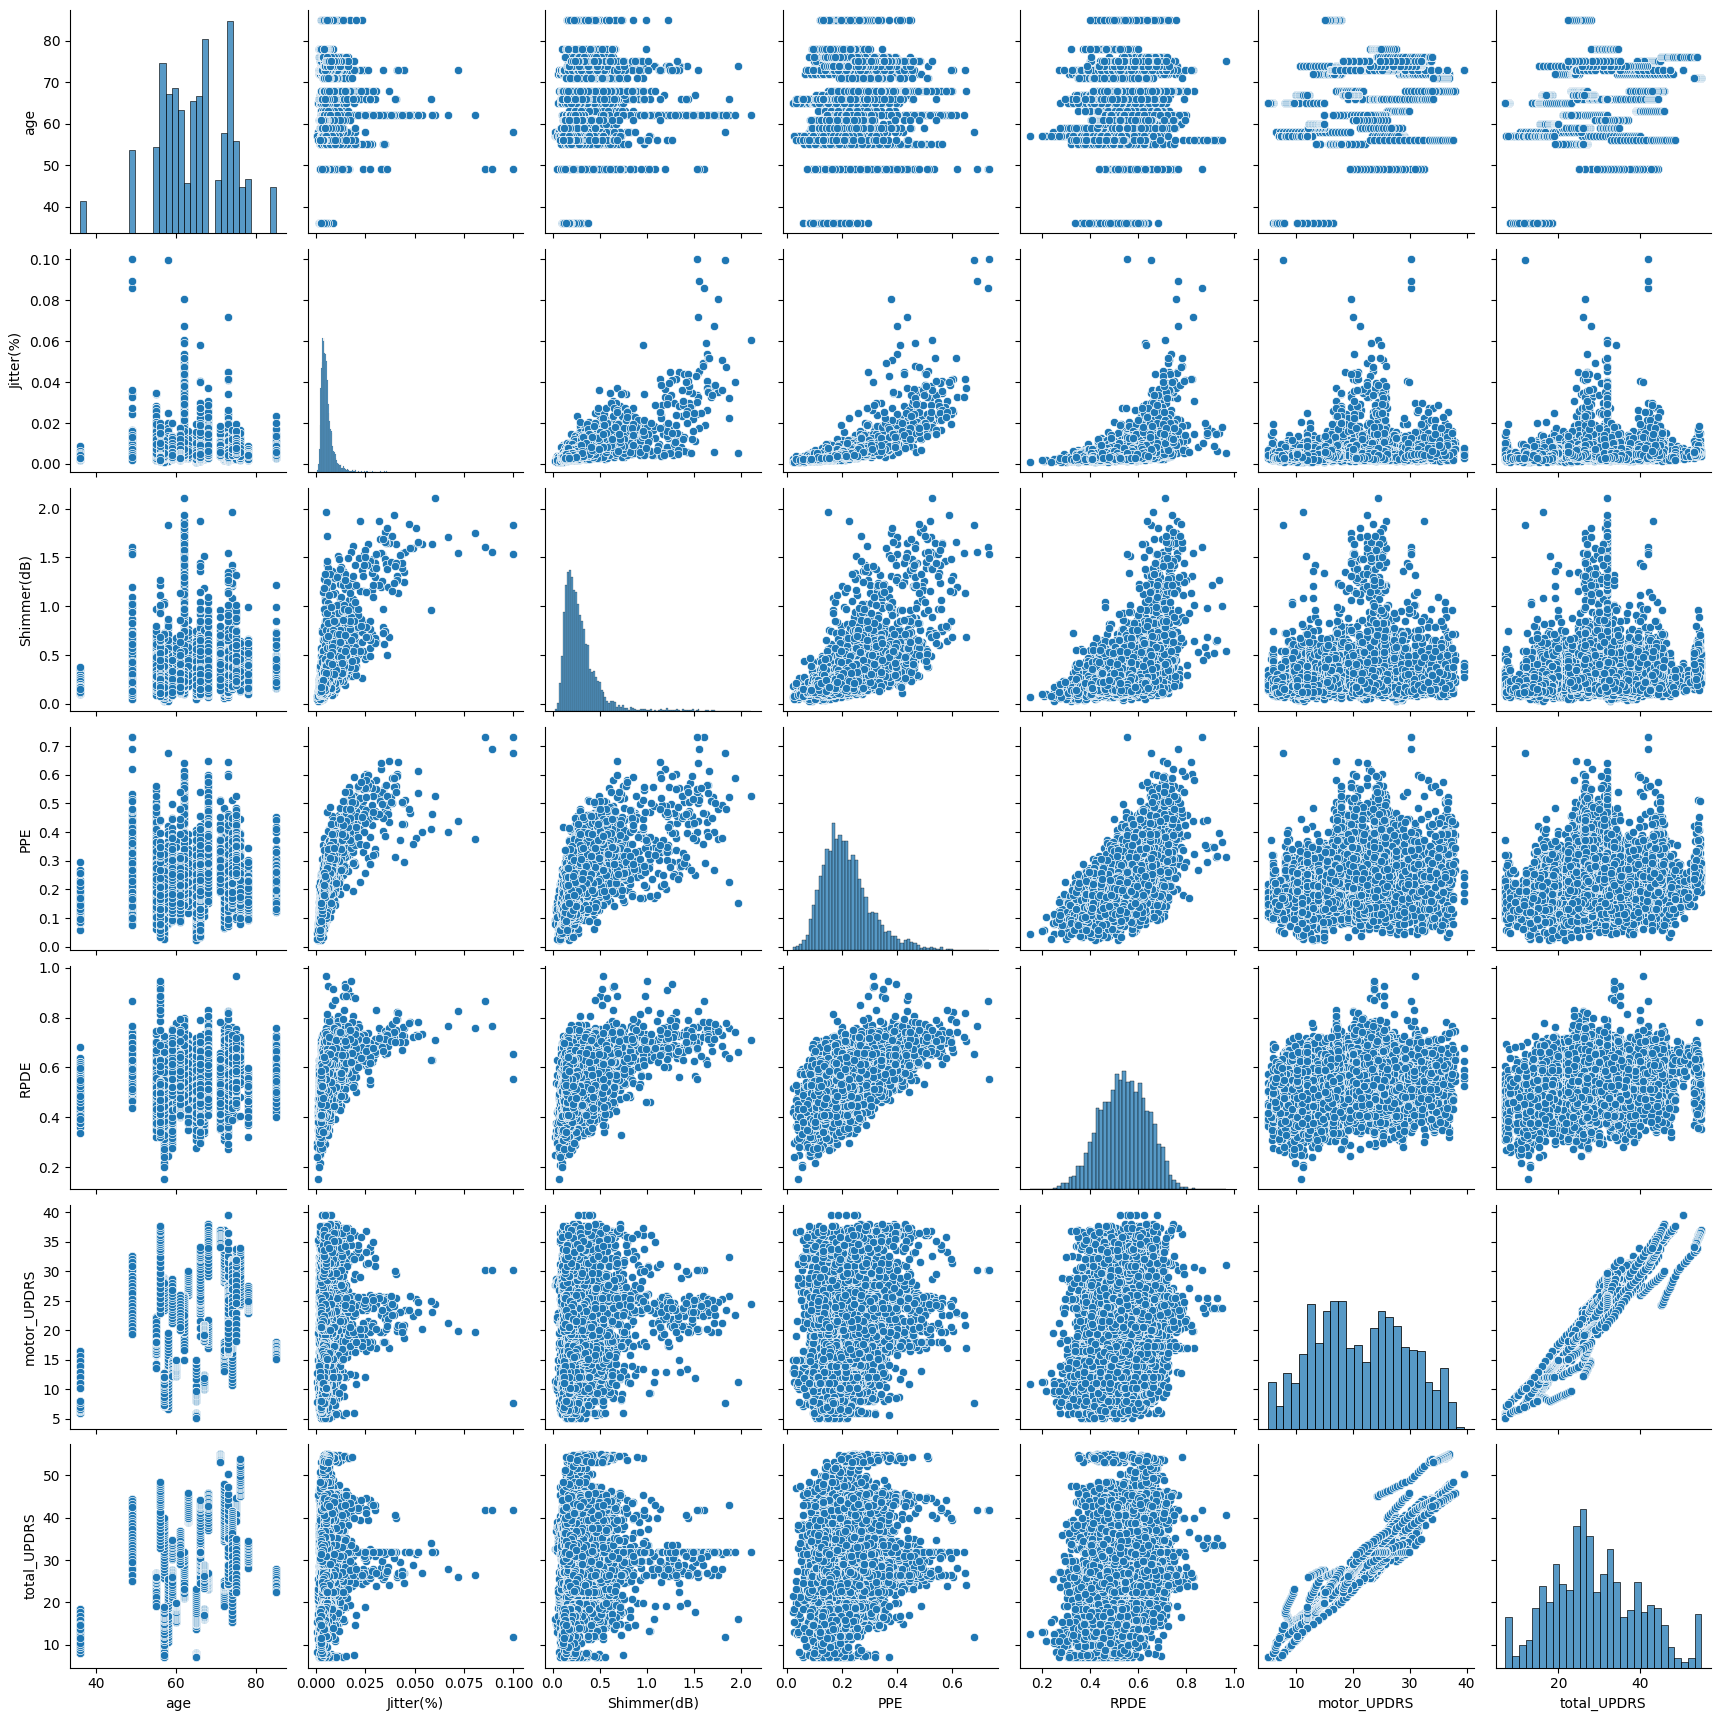

In [ ]:
# Selecting features for the pair plot based on correlation results
selected_features = ['age', 'Jitter(%)', 'Shimmer(dB)', 'PPE', 'RPDE', 'motor_UPDRS', 'total_UPDRS']

# Creating a pair plot
sns.pairplot(data[selected_features])
plt.show()

- Age is distributed relatively evenly across UPDRS scores, without a clear linear relationship.

- Most of the data is concentrated at lower jitter values. There doesn’t appear to be a distinct trend between Jitter(%) and UPDRS scores, which suggests the relationship might be complex or nonlinear.

- Shimmer(dB) also shows a concentration at lower values, similar to Jitter(%). Again, there's no apparent linear relationship with UPDRS scores.

- PPE, RPDE seems to have a spread that suggests a relationship with UPDRS scores. It does not show a strong linear pattern but indicates variability that may be captured by a model.

- Non-Linear Relationships: Many of the features do not have a clear linear relationship with UPDRS scores, which suggests that models capable of capturing non-linear relationships (like tree-based methods or neural networks) might perform better.

# Feature Selection Methods

# SelectKBest Feature Selection technique

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

X = data.drop(['total_UPDRS', 'motor_UPDRS'], axis=1)
y = data['total_UPDRS']

# Normalize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# SelectKBest for feature selection
select_k_best = SelectKBest(score_func=f_regression, k='all')
fit = select_k_best.fit(X_scaled, y)
features_scores = pd.DataFrame(fit.scores_)
features_columns = pd.DataFrame(X.columns)

# Concatenate dataframes for better visualization
feature_scores = pd.concat([features_columns, features_scores], axis=1)
feature_scores.columns = ['Feature', 'Score']  # naming the dataframe columns
print(feature_scores.nlargest(10, 'Score'))  # Print 10 best features

          Feature       Score
0             age  626.384196
15            HNR  158.568475
16           RPDE  147.837418
18            PPE  147.495825
12  Shimmer:APQ11   87.090330
17            DFA   76.499766
9     Shimmer(dB)   58.068422
1          gender   54.869517
8         Shimmer   50.473435
11   Shimmer:APQ5   41.320401


SelectKBest selects features according to the k highest scores with a regression score function.

**These are the features most strongly related to total_UPDRS according to univariate statistical tests.**

# RandomForest Feature Importance Method

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.ensemble import RandomForestRegressor
# Initialize and fit a Random Forest model for feature importances
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)
importances = rf.feature_importances_

# Summarize feature importances
feature_importances = pd.DataFrame(rf.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

               importance
age              0.643440
gender           0.086436
DFA              0.084911
test_time        0.067340
HNR              0.031284
RPDE             0.030317
Jitter(Abs)      0.015831
NHR              0.006099
PPE              0.004867
Jitter:DDP       0.003391
Shimmer:APQ5     0.003269
Shimmer:APQ3     0.003245
Shimmer(dB)      0.003185
Shimmer:DDA      0.003142
Shimmer:APQ11    0.002998
Jitter:RAP       0.002738
Shimmer          0.002627
Jitter(%)        0.002556
Jitter:PPQ5      0.002322


**The Random Forest feature importances provide a model-based ranking, which can often capture more complex relationships than univariate tests.**

# Recursive Feature Elimination (RFE)

In [ ]:
# RFE for feature selection
rfe = RFE(estimator=RandomForestRegressor(n_estimators=100, random_state=42), n_features_to_select=10)
rfe.fit(X_scaled, y)

# Summarize RFE feature ranking
rfe_ranking = pd.DataFrame(rfe.ranking_, index=X.columns, columns=['Rank']).sort_values('Rank')
print(rfe_ranking)

               Rank
age               1
gender            1
test_time         1
RPDE              1
Jitter(Abs)       1
HNR               1
NHR               1
Jitter:DDP        1
Shimmer:DDA       1
DFA               1
Shimmer:APQ5      2
PPE               3
Shimmer(dB)       4
Shimmer:APQ3      5
Shimmer:APQ11     6
Jitter(%)         7
Jitter:RAP        8
Shimmer           9
Jitter:PPQ5      10


**These are the features that the RFE process has identified as the most predictive, after iteratively pruning less important ones.**

In [ ]:
data.columns

Index(['age', 'gender', 'test_time', 'motor_UPDRS', 'total_UPDRS', 'Jitter(%)',
       'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer',
       'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11',
       'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

# Final Selected Features

In [ ]:
from sklearn.preprocessing import StandardScaler
X = data[['age',
 'gender',
 'test_time',
 'Jitter(%)',
 'Jitter(Abs)',
 'Jitter:RAP',
 'Shimmer',
 'Shimmer:APQ5',
 'Shimmer:APQ11',
 'HNR',
 'RPDE',
 'DFA',
 'PPE']]
# Normalize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = data['total_UPDRS']

# Model Development

# Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

lr = r2

Mean Squared Error: 93.90824064662652
R-squared: 0.17503636549474522


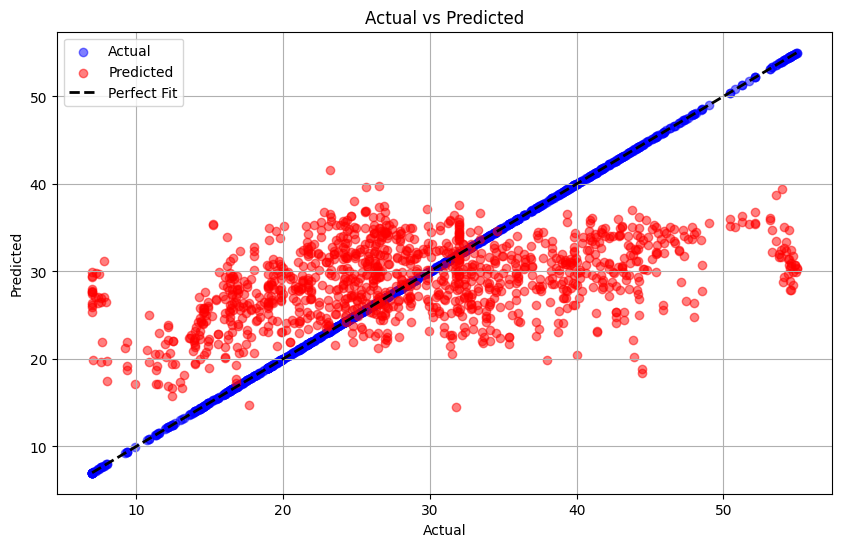

In [ ]:
import matplotlib.pyplot as plt

# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))

# Scatter plot for actual values
plt.scatter(y_test, y_test, color='blue', label='Actual', alpha=0.5)  # Plot actual values along the diagonal

# Scatter plot for predicted values
plt.scatter(y_test, y_pred, color='red', label='Predicted', alpha=0.5)  # Plot predicted values

# Plotting the perfect fit line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit')

plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()

# Decision Tree Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initializing decision tree regressor
dt_regressor = DecisionTreeRegressor(random_state=1)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

# Accuracy before using Hyper Parameter Technique

In [ ]:
# Making predictions on the test set
y_pred = dt_regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
dt = r2

Mean Squared Error: 7.47114330077579
R-squared: 0.9343676179121455


# Hyper Parameter Tuning

In [ ]:
# Defining the hyperparameters to tune
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Performing grid search with cross-validation
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initializing decision tree regressor with the best hyperparameters
best_dt_regressor = DecisionTreeRegressor(random_state=42, **best_params)

# Training the model with the best hyperparameters
best_dt_regressor.fit(X_train, y_train)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10}


DecisionTreeRegressor(max_depth=20, min_samples_split=10, random_state=42)

# Accuracy After Performing Hyper Parameter Tuning

In [ ]:
# Making predictions on the test set
y_pred = best_dt_regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 7.49462098040618
R-squared: 0.93416137156162


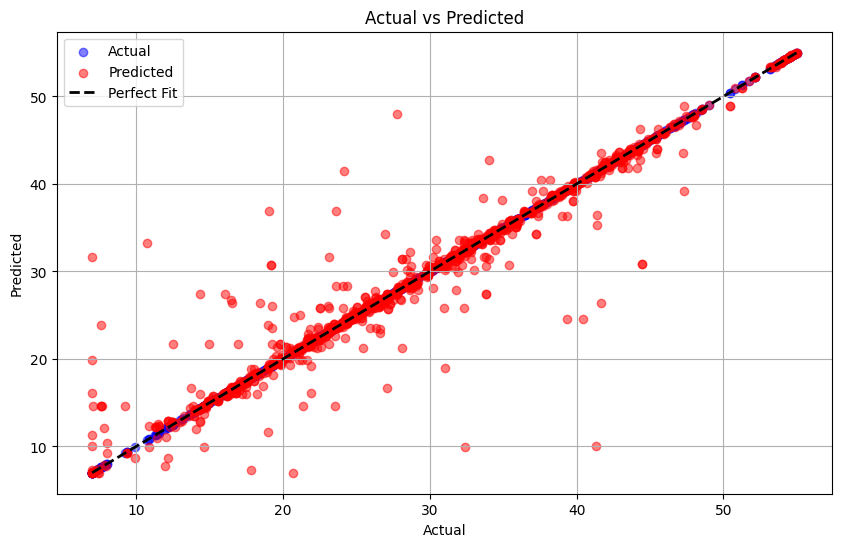

In [ ]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))

# Plotting actual values
plt.scatter(y_test, y_test, color='blue', label='Actual', alpha=0.5)  # Plot actual values along the diagonal

# Plotting predicted values
plt.scatter(y_test, y_pred, color='red', label='Predicted', alpha=0.5)  # Plot predicted values

# Plotting the perfect fit line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit')

plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()

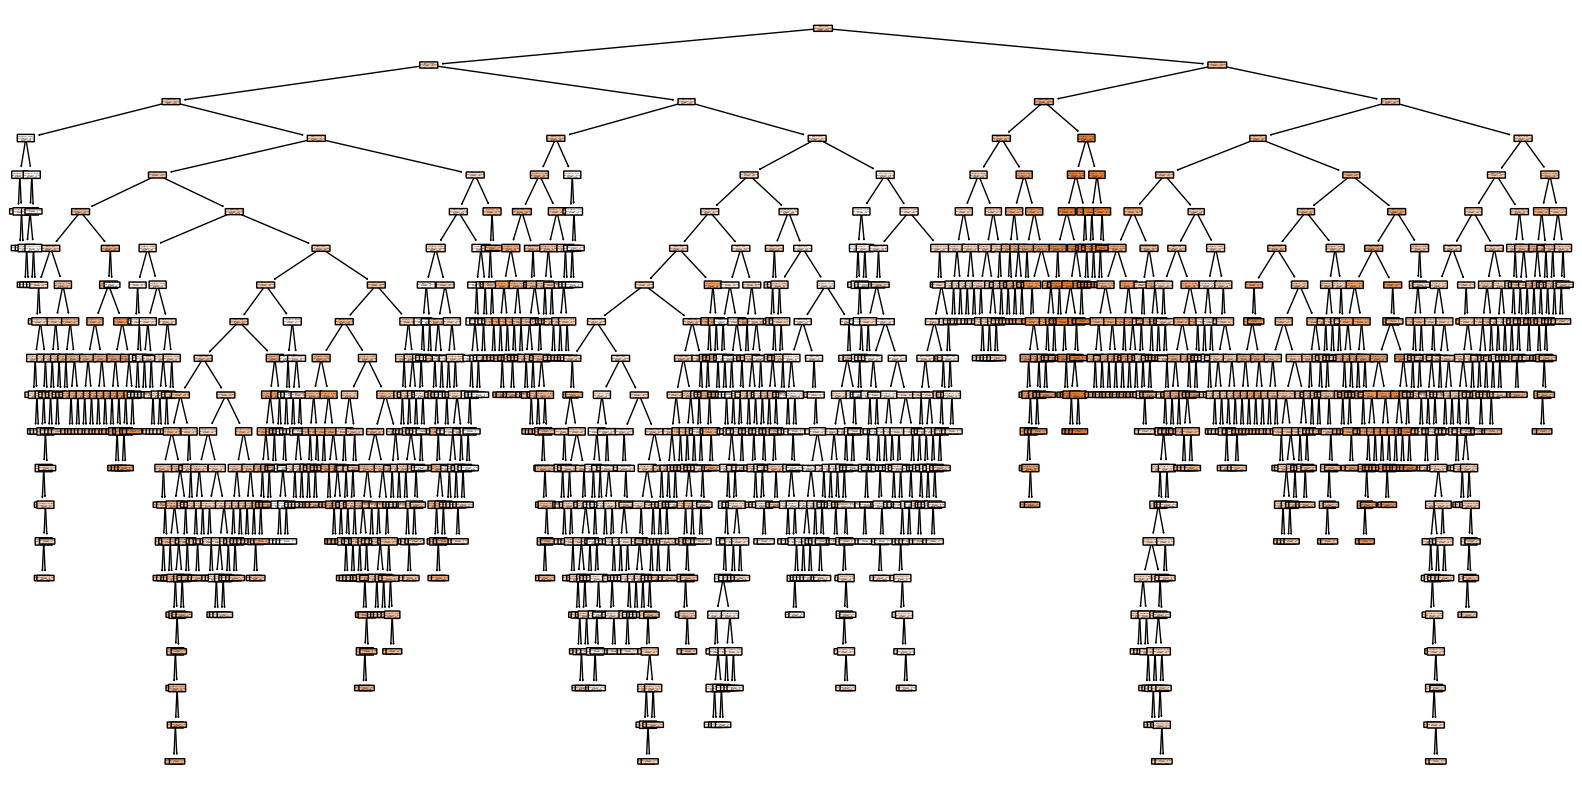

In [ ]:
from sklearn.tree import plot_tree

# Plotting decision tree structure
plt.figure(figsize=(20,10))  # Adjust the figure size as needed
plot_tree(best_dt_regressor, feature_names=list(X.columns), filled=True, rounded=True)
plt.show()

# Support Vector Machine



In [ ]:
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Feature Engineering
kbins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
y_discrete = kbins.fit_transform(y.values.reshape(-1, 1)).astype(int)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_discrete, test_size=0.2, random_state=42)

# Training SVM Model without Scaling
svm_classifier_no_scaling = SVC()
svm_classifier_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = svm_classifier_no_scaling.predict(X_test)

# Evaluating Model without Scaling
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
precision_no_scaling = precision_score(y_test, y_pred_no_scaling, average='weighted')
recall_no_scaling = recall_score(y_test, y_pred_no_scaling, average='weighted')
f1_no_scaling = f1_score(y_test, y_pred_no_scaling, average='weighted')
conf_matrix_no_scaling = confusion_matrix(y_test, y_pred_no_scaling)

# Performing Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training SVM Model with Scaling
svm_classifier_scaling = SVC()
svm_classifier_scaling.fit(X_train_scaled, y_train)
y_pred_scaling = svm_classifier_scaling.predict(X_test_scaled)

# Evaluating Model with Scaling
accuracy_scaling = accuracy_score(y_test, y_pred_scaling)
precision_scaling = precision_score(y_test, y_pred_scaling, average='weighted')
recall_scaling = recall_score(y_test, y_pred_scaling, average='weighted')
f1_scaling = f1_score(y_test, y_pred_scaling, average='weighted')
conf_matrix_scaling = confusion_matrix(y_test, y_pred_scaling)

# Printing Evaluation Metrics
print("Evaluation Metrics without Scaling:")
print("Accuracy:", accuracy_no_scaling)
print("Precision:", precision_no_scaling)
print("Recall:", recall_no_scaling)
print("F1 Score:", f1_no_scaling)
print("Confusion Matrix:\n", conf_matrix_no_scaling)
print("\n")
print("Evaluation Metrics with Scaling:")
print("Accuracy:", accuracy_scaling)
print("Precision:", precision_scaling)
print("Recall:", recall_scaling)
print("F1 Score:", f1_scaling)
print("Confusion Matrix:\n", conf_matrix_scaling)

Evaluation Metrics without Scaling:
Accuracy: 0.5217391304347826
Precision: 0.5107863909773069
Recall: 0.5217391304347826
F1 Score: 0.37421808147456864
Confusion Matrix:
 [[ 19 321   0]
 [  0 593   0]
 [  3 237   0]]


Evaluation Metrics with Scaling:
Accuracy: 0.7885763000852515
Precision: 0.7881476817480255
Recall: 0.7885763000852515
F1 Score: 0.7838781527393969
Confusion Matrix:
 [[241  75  24]
 [ 29 537  27]
 [ 24  69 147]]


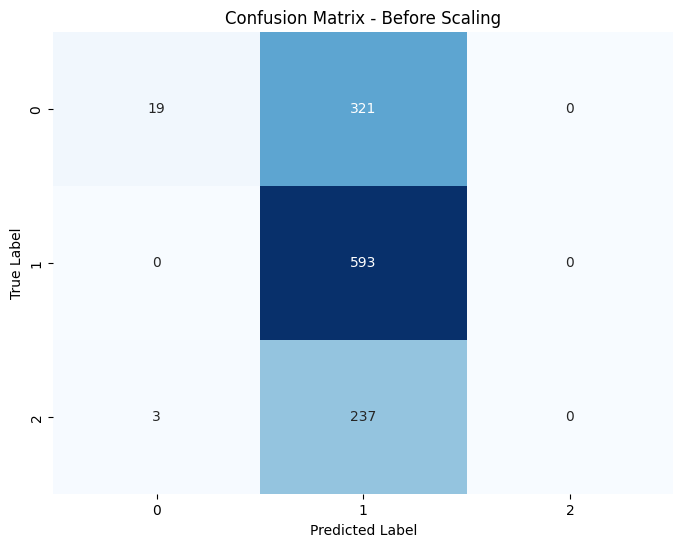

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting confusion matrix for before scaling
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_no_scaling, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix - Before Scaling")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

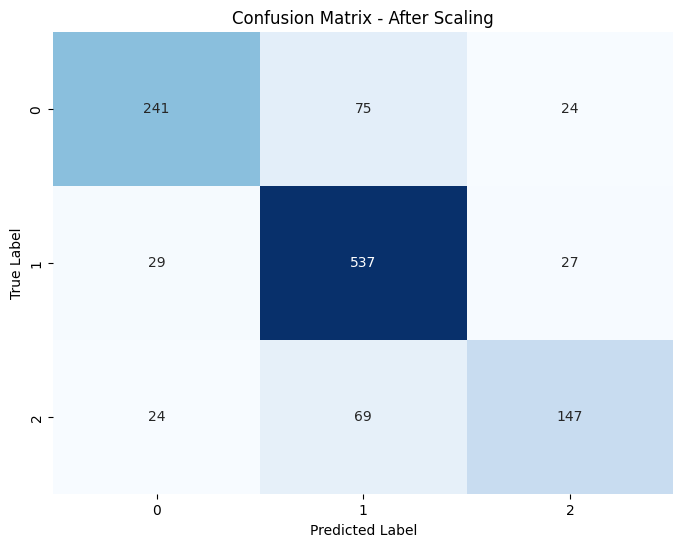

In [ ]:
# Plotting confusion matrix for after scaling
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_scaling, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix - After Scaling")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Random Forest


# Before Hyper Parameter Tuning

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import GridSearchCV

kbins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')  # Adjust n_bins as needed
y_discrete = kbins.fit_transform(y.values.reshape(-1, 1)).astype(int)

#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_discrete, test_size=0.2, random_state=42)

# Building the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluating the model
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9292412617220801


# After Hyper Parameter Tuning

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20]
}

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_rf_classifier = grid_search.best_estimator_

# Evaluating the model
y_pred = best_rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
rf_accuracy = accuracy

Accuracy: 0.9309462915601023


# Model Comparison

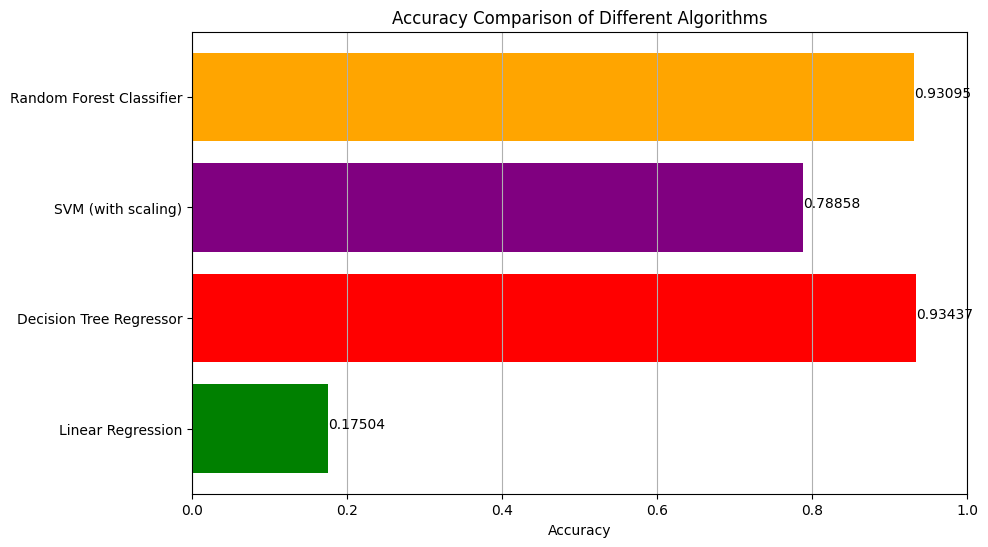

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Accuracy scores
accuracy_scores = {
    "Linear Regression": lr,
    "Decision Tree Regressor": dt,
    "SVM (with scaling)": accuracy_scaling,
    "Random Forest Classifier": rf_accuracy
}

# Extracting the names and scores for plotting
algorithms = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.barh(algorithms, scores, color=['green', 'red', 'purple', 'orange'])
plt.xlabel('Accuracy')
plt.title('Accuracy Comparison of Different Algorithms')
plt.xlim(0, 1)  # Accuracy scores are between 0 and 1
plt.grid(axis='x')

# Adding text labels to each bar
for index, value in enumerate(scores):
    plt.text(value, index, f'{value:.5f}')

plt.show()

# Making Predictions On Decision Tree Regressor

In [ ]:
# Generating test data
np.random.seed(42)
test_data = {
    'age': np.random.randint(50, 80, size=10),
    'gender': np.random.randint(0, 2, size=10),
    'test_time': np.random.uniform(0, 100, size=10),
    'Jitter(%)': np.random.uniform(0.001, 0.1, size=10),
    'Jitter(Abs)': np.random.uniform(0.00001, 0.0001, size=10),
    'Jitter:RAP': np.random.uniform(0.001, 0.1, size=10),
    'Shimmer': np.random.uniform(0.01, 0.1, size=10),
    'Shimmer:APQ5': np.random.uniform(0.01, 0.1, size=10),
    'Shimmer:APQ11': np.random.uniform(0.01, 0.1, size=10),
    'HNR': np.random.uniform(15, 30, size=10),
    'RPDE': np.random.uniform(0.2, 0.7, size=10),
    'DFA': np.random.uniform(0.5, 0.8, size=10),
    'PPE': np.random.uniform(0.1, 0.4, size=10)
}
test_df = pd.DataFrame(test_data)

# Displaying the generated test data
print("Generated Test Data:")
print(test_df)

# Predicting total_UPDRS scores
predicted_total_updrs = best_dt_regressor.predict(test_df)
print("Predicted total_UPDRS Scores:")
print(predicted_total_updrs)

Generated Test Data:
   age  gender  test_time  Jitter(%)  Jitter(Abs)  Jitter:RAP   Shimmer  \
0   56       0   2.058449   0.061573     0.000065    0.013082  0.097263   
1   69       0  96.990985   0.014810     0.000025    0.050023  0.079762   
2   78       0  83.244264   0.029922     0.000016    0.004404  0.094555   
3   64       0  21.233911   0.037270     0.000095    0.091023  0.090534   
4   60       1  18.182497   0.046151     0.000097    0.026619  0.063811   
5   57       0  18.340451   0.078732     0.000083    0.066590  0.092969   
6   78       1  30.424224   0.020768     0.000037    0.031859  0.017964   
7   70       1  52.475643   0.051909     0.000019    0.052487  0.027638   
8   56       1  43.194502   0.059649     0.000072    0.055124  0.014070   
9   75       0  29.122914   0.005599     0.000050    0.019301  0.039280   

   Shimmer:APQ5  Shimmer:APQ11        HNR      RPDE       DFA       PPE  
0      0.044981       0.079502  27.946551  0.259797  0.509429  0.186925  
1    